In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
total_deaths = pd.read_csv('../data/total_deaths.csv')

In [3]:
total_deaths.head()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
0,2019-12-31,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,2020-01-03,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [25]:
len(total_deaths.columns)

181

In [6]:
%matplotlib inline

In [25]:
total_deaths['datetime'] = pd.to_datetime(total_deaths['date'])
total_deaths = total_deaths.set_index('datetime')
total_deaths.drop(['date'], axis=1, inplace=True)
total_deaths.head()

,World,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
datetime,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0,...,0.0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0,...,0.0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0,...,0.0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2020-01-03,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0,...,0.0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0,...,0.0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN


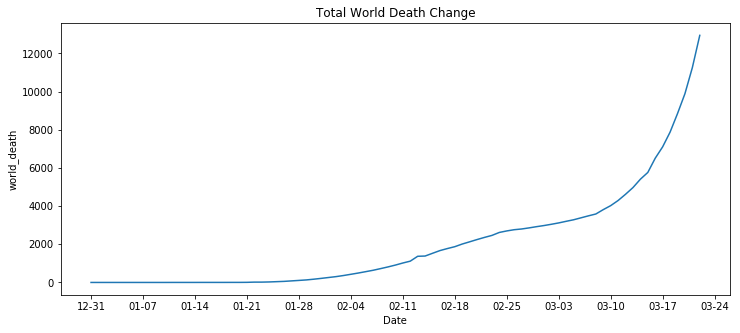

In [69]:
fig, ax = plt.subplots(figsize=(12, 5))

# Add x-axis and y-axis
ax.plot(total_deaths.index.values,
       total_deaths['World'])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="world_death",
       title="Total World Death Change")

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()

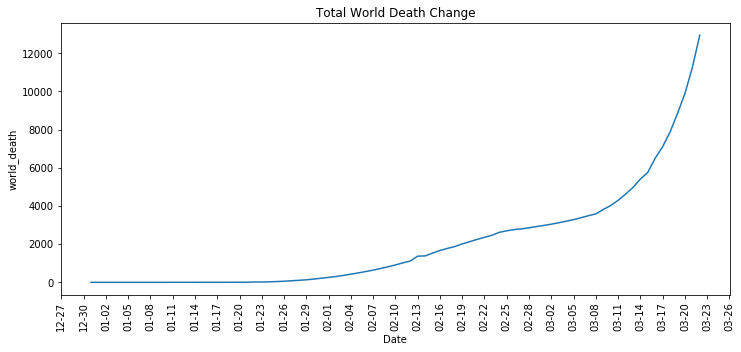

In [70]:
fig, ax = plt.subplots(figsize=(12, 5))

# Add x-axis and y-axis
ax.plot(total_deaths.index.values,
       total_deaths['World'])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="world_death",
       title="Total World Death Change")

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.xticks(rotation = 90)
plt.show()

In [28]:
# here i already covert the datetime to index ,so it wouldn't appear in column names
leading_countries = [column for column in total_deaths.columns if total_deaths.iloc[82][column] > 100]

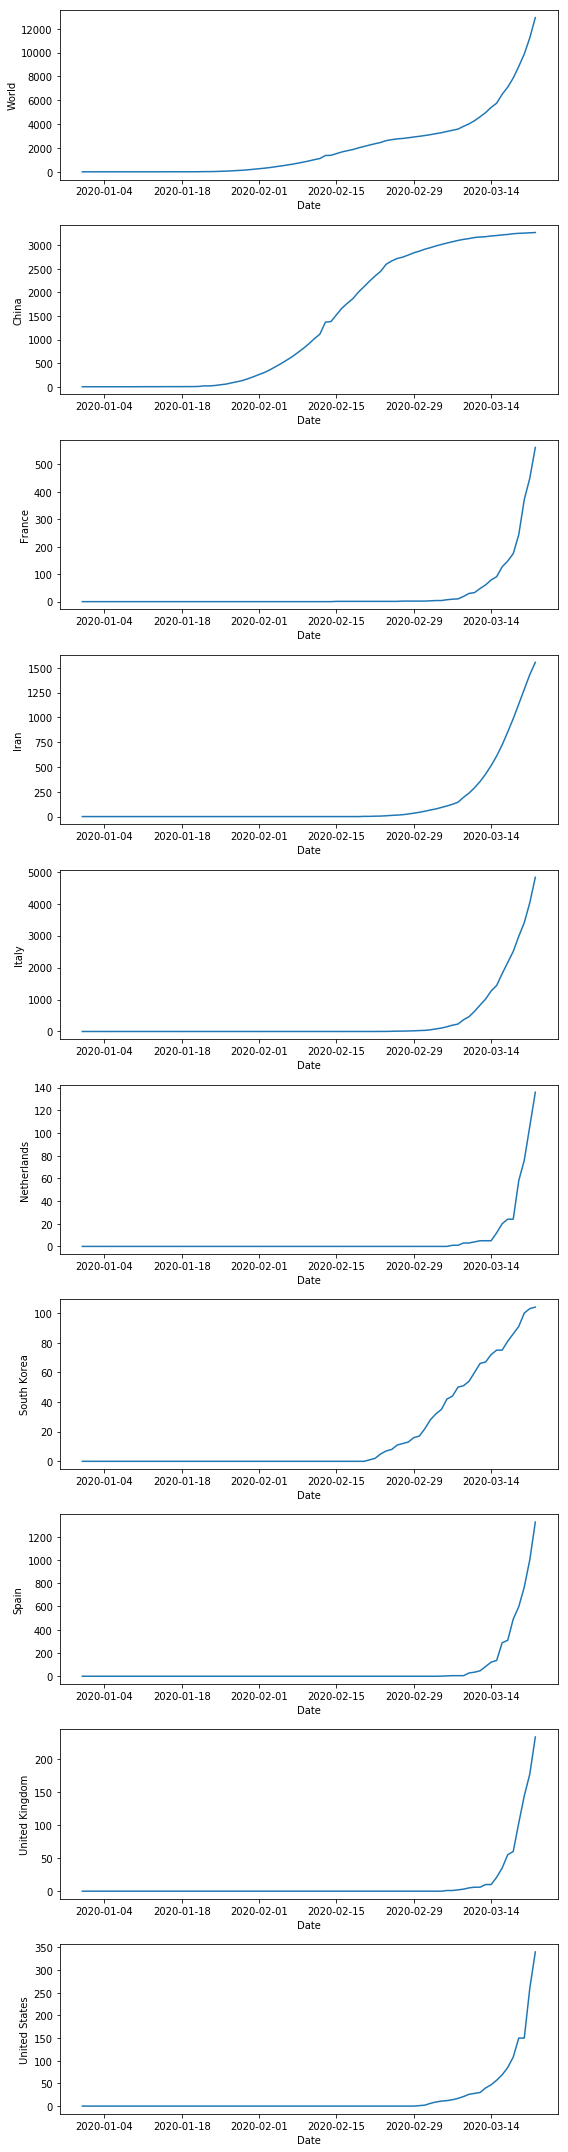

In [52]:
fig, ax = plt.subplots(ncols = 1, nrows = len(leading_countries),figsize=(8, 30))
for i,row in enumerate(ax):
    row.plot(total_deaths[leading_countries[i]])
    row.set(xlabel="Date",
       ylabel=leading_countries[i])
plt.tight_layout()
plt.show()

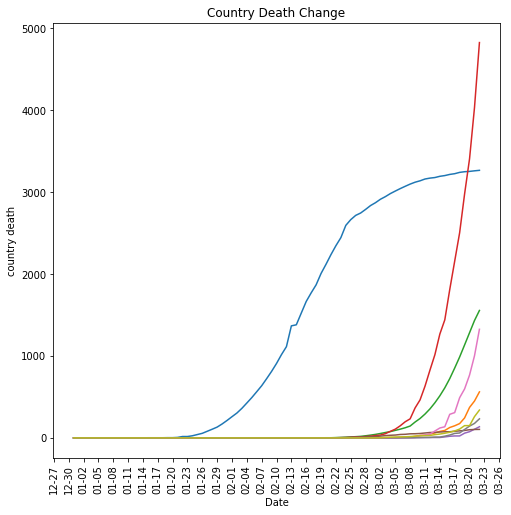

In [57]:
fig, ax = plt.subplots(figsize=(8, 8))

# Add x-axis and y-axis
ax.plot(total_deaths.index.values,
       total_deaths[leading_countries[1:]])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="country death",
       title="Country Death Change")

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.xticks(rotation = 90)
plt.show()